TEXT TO AUDIO

In [ ]:
!pip install gtts

In [ ]:
from gtts import gTTS

In [ ]:
text='Hello Buddy'

In [ ]:
lang='en'

In [ ]:
res=gTTS(text=text,lang=lang,slow=False)

In [ ]:
res.save('audio.mp3')

AUDIO TO TEXT

In [ ]:
!pip install SpeechRecognition

In [ ]:
import speech_recognition as sr

RECOGNIZES AUDIO AND GENERATES WAVE FILE

In [ ]:
model = sr.Recognizer()

In [ ]:
!pip install pydub

In [ ]:
mp3_file=r'/content/myaudio.mp3'
from pydub import AudioSegment
from pydub.playback import play
audio = AudioSegment.from_mp3(mp3_file)
audio.export("temp.wav",format="wav")


<_io.BufferedRandom name='temp.wav'>

In [ ]:
audio_file = r'/content/temp.wav'
with sr.AudioFile(audio_file) as source:
  audio_data = model.record(source)
  text = model.recognize_google(audio_data)
text


"I'm d07 and with the continuation of the previous slide as we consider the data input so we have to check whether the data is in the valid range or not so if 0 is less than or equal to data and less than equal to 255 then we can call the function transmit asynchronous cereal with a parameter data if this is possible it's okay then we can process the data and the Order of the synchronous cereal transmission is given else if the condition is not satisfied that means that the data is not in the valley range then you print address please enter a number between 0 and 255 as this is the volume change the test cases with input 0 if you consider 0 in the start is 0 and the double one representing the end of the transmission with zero zero is obviously represented as 800 format for 8:00 and 0 followed by 0711 that is what is transmitted seriously and with input 100 100 100 is represented as a double 01000 in binary form of to make it 8 Bit 0110016 And obviously the left is the start with 0.001

TO EXTRACT TEXT FROM IMAGE

In [ ]:
!pip install pytesseract pillow

In [ ]:
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

In [ ]:
/content/textimage1.jpgimage_path = r'/content/textimage1.jpg'

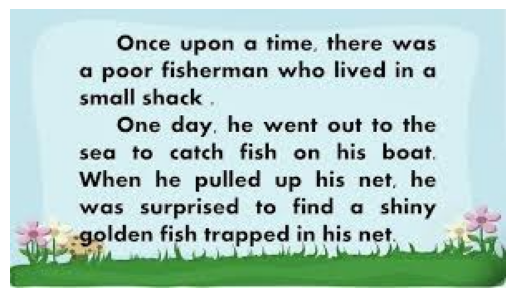

In [ ]:
plt.imshow(Image.open(image_path))
plt.axis('off')
plt.show()

In [ ]:
img = Image.open(image_path)
text = pytesseract.image_to_string(img)
print("Extracted Text:")
text

Extracted Text:


' \n\nOnce upon a time, there was\n@ poor fisherman who lived in a\nsmall shack\n\n‘One day, he went out to the\nsea to catch fish on his boat,\nWhen he pulled up his net, he\n\n \n\x0c'

IMAGE -> TEXT -> SPEECH

In [ ]:
!pip install gTTS SpeechRecognition pydub pytesseract pillow


In [ ]:
from gtts import gTTS
import speech_recognition as sr
from pydub import AudioSegment
from pydub.playback import play
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt


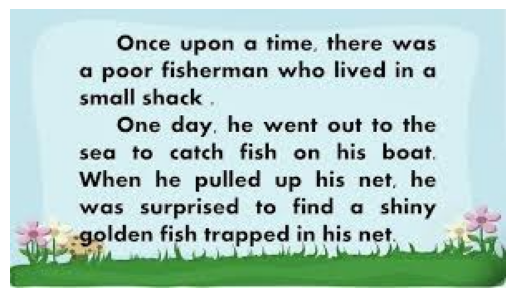

Extracted Text:
  

Once upon a time, there was
@ poor fisherman who lived in a
small shack

‘One day, he went out to the
sea to catch fish on his boat,
When he pulled up his net, he

 



In [ ]:
# Set image file path (change it to your actual file path if different)
image_path = '/content/textimage1.jpg'

# Load and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Extract text using pytesseract
text = pytesseract.image_to_string(img)
print("Extracted Text:\n", text)


In [ ]:
# Convert extracted text to speech
tts = gTTS(text=text, lang='en', slow=False)

# Save the audio file
tts.save("/content/audio1.mp3")
print("Audio saved as '/content/audio1.mp3'")


Audio saved as '/content/audio1.mp3'


AUDIO -> EXTRACT ARITHMETIC OPERATION -> EVALUATE AND OUTPUT THE RESULT

In [ ]:
!pip install SpeechRecognition pydub word2number


In [ ]:
import speech_recognition as sr
from pydub import AudioSegment
from word2number import w2n
import re


In [ ]:
# Direct path to your saved audio file
audio_file = '/content/myaudio2.mp3'  # Change this path if your file is located elsewhere

# Convert to WAV if it's an MP3 file
if audio_file.endswith('.mp3'):
    audio = AudioSegment.from_mp3(audio_file)
    audio.export("/content/converted.wav", format="wav")
    audio_path = "/content/converted.wav"
else:
    audio_path = audio_file


In [ ]:
import speech_recognition as sr

# Initialize recognizer
recognizer = sr.Recognizer()

# Load and process the audio file
with sr.AudioFile(audio_path) as source:
    audio_data = recognizer.record(source)

try:
    spoken_text = recognizer.recognize_google(audio_data)
    print("Recognized Speech:", spoken_text)
except sr.UnknownValueError:
    print("Could not understand the audio.")
    spoken_text = ""
except sr.RequestError as e:
    print(f"Request error from Google Speech Recognition service: {e}")
    spoken_text = ""


Recognized Speech: 90 * 30


In [ ]:
import re
from word2number import w2n

def spoken_to_expression(spoken_text):
    spoken_text = spoken_text.lower()

    # Replace common operator words with symbols
    spoken_text = spoken_text.replace("plus", "+")
    spoken_text = spoken_text.replace("minus", "-")
    spoken_text = spoken_text.replace("times", "*")
    spoken_text = spoken_text.replace("multiplied by", "*")
    spoken_text = spoken_text.replace("x", "*")
    spoken_text = spoken_text.replace("divided by", "/")

    # Split into tokens (numbers and operators)
    tokens = re.split(r'(\+|\-|\*|/)', spoken_text)

    expression = ""
    for token in tokens:
        token = token.strip()
        if token in ['+', '-', '*', '/']:
            expression += token
        elif token:
            try:
                number = w2n.word_to_num(token)
                expression += str(number)
            except:
                print(f"Could not convert: '{token}'")
                return None
    return expression

expr = spoken_to_expression(spoken_text)
print("Parsed Expression:", expr)


Parsed Expression: 90*30


In [ ]:
if expr:
    try:
        result = eval(expr)
        print("Evaluation Result:", result)
    except Exception as e:
        print(f"Error during evaluation: {e}")
else:
    print("Invalid or incomplete expression.")


Evaluation Result: 2700


In [ ]:
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

if expr:
    speech_output = f"The result is {result}"
    tts = gTTS(text=speech_output, lang='en')
    tts.save("/content/result.mp3")
    display(Audio("/content/result.mp3", autoplay=True))
